In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#머신러닝 분석에 유용한 라이브러리

In [3]:
from sklearn.datasets import load_digits
#1797개의 8x8 images

In [4]:
digits = load_digits()

In [5]:
dir(digits)
#dir() 내장 함수는 어떤 객체를 인자로 넣어주면 해당 객체가 어떤 변수와 메소드(method)를 가지고 있는지 나열

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
len(digits.data)

1797

In [7]:
len(digits.data[0])
#8x8

64

In [8]:
digits.data[0]
#1797개의 이미지중 첫 번째 이미지

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

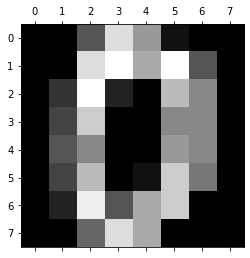

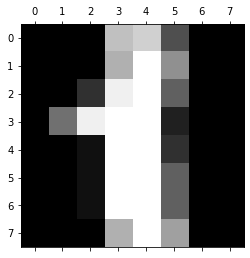

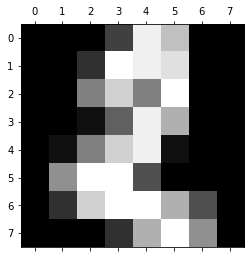

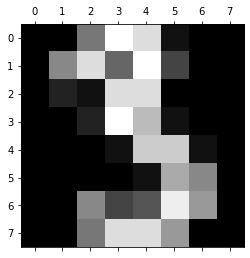

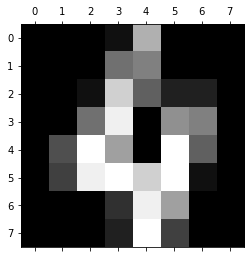

In [9]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])
    #plt.imshow(digits.images[0])

In [10]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [14]:
len(X_train)

1437

In [15]:
len(X_test)

360

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train, y_train)

C:\Users\mwh51\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
model.score(X_test, y_test)

0.9555555555555556

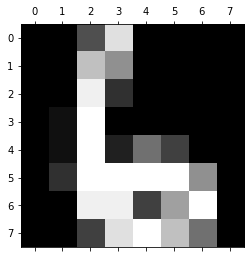

In [20]:
plt.matshow(digits.images[67])

In [21]:
digits.target[67]

6

In [22]:
model.predict([digits.data[67]])
#예측하기

array([6])

In [24]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [25]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
#오차행렬(Confusion_matrix)

cm = confusion_matrix(y_test, y_predicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  1, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  1,  1, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 34,  0,  1],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 34]], dtype=int64)

Text(69.0, 0.5, 'Truth')

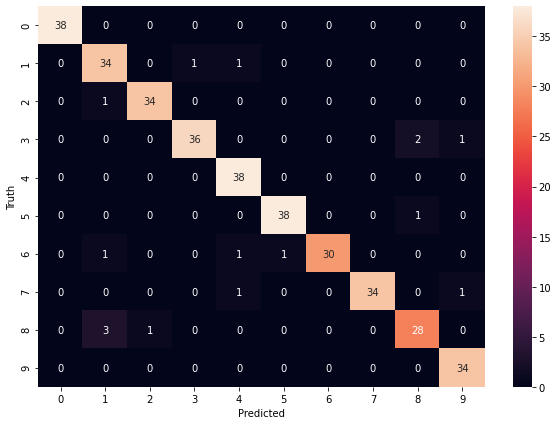

In [27]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#1을 1로 예측한 경우의 수는 34, 8로 예측한 경우의 수는 3이다.